In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as st

In [ ]:
data = pd.read_csv('/content/sample_data/employment.csv')
data.head(4)

In [ ]:
data.tail()

In [ ]:
data.info()

In [18]:
data.tail()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5
121,2010-02-01,18.8,12.0,27.1,13.6,5.6,7.5,4.0,10.0,12.7,12.1,10.7,9.7,9.9,6.5,10.5,10.0


In [19]:
data.shape

(122, 17)

In [20]:
data.isnull().sum()

datestamp                         0
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

In [21]:
data.isna().sum()

datestamp                         0
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [23]:
#data.drop_duplicates(keep='first')

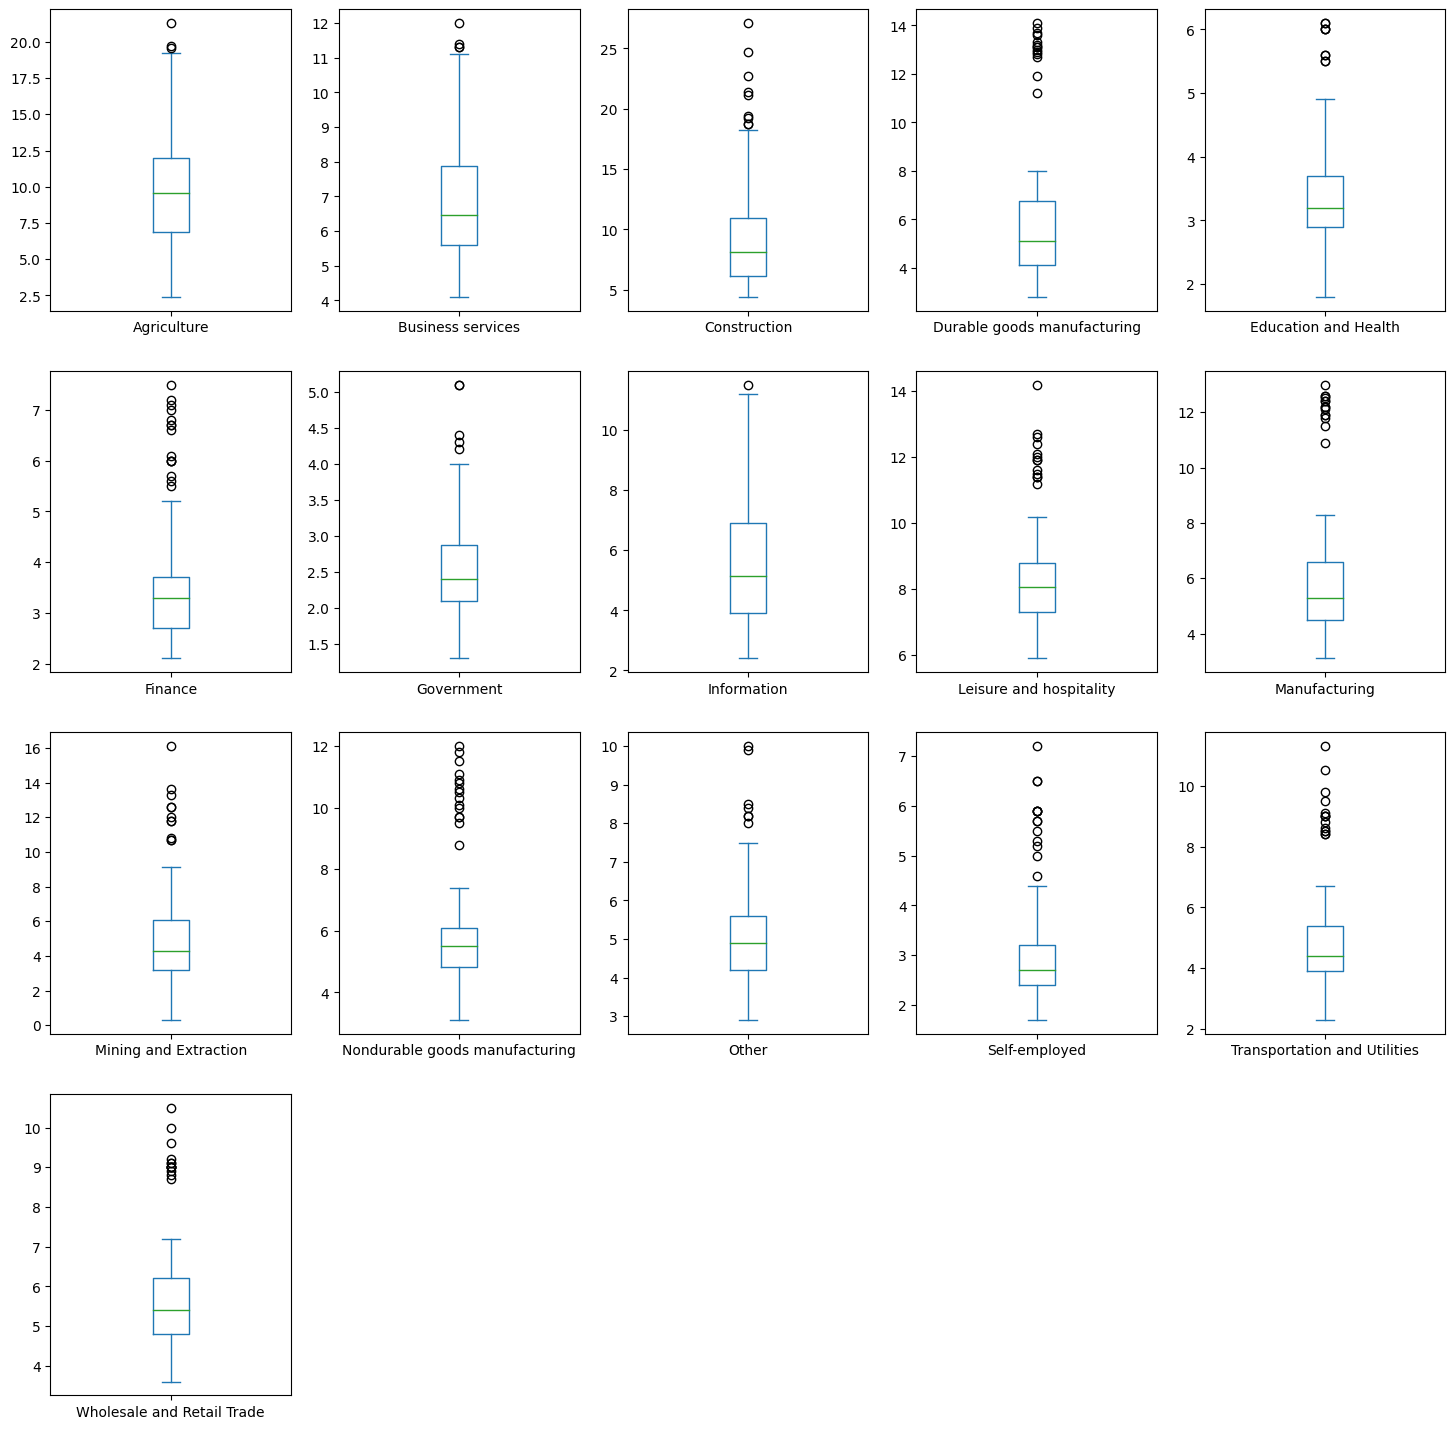

In [24]:
data.plot(kind='box',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

In [25]:
df=data.select_dtypes(include=['number']).copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #intervalle interquantile
outliers = ((df > Q3 + 1.5 * IQR) | (df < Q1 - 1.5 * IQR)).sum()
for col in df.columns:
    print(f"Variable : {col}")
    print(f"Q1 : {Q1[col]}")
    print(f"Q3 : {Q3[col]}")
    print(f"IQR : {IQR[col]}")
    print(f"Nombre de valeurs extrêmes : {outliers[col]}")
    print("---------------------------")

# affichage sous forme de tableau
#outliers_df = pd.DataFrame({'Variable': outliers_count.index, 'Nombre de valeurs extrêmes': outliers.values})
#print(outliers_df)

Variable : Agriculture
Q1 : 6.9
Q3 : 11.95
IQR : 5.049999999999999
Nombre de valeurs extrêmes : 3
---------------------------
Variable : Business services
Q1 : 5.6
Q3 : 7.875
IQR : 2.2750000000000004
Nombre de valeurs extrêmes : 4
---------------------------
Variable : Construction
Q1 : 6.1
Q3 : 10.975
IQR : 4.875
Nombre de valeurs extrêmes : 9
---------------------------
Variable : Durable goods manufacturing
Q1 : 4.125
Q3 : 6.775
IQR : 2.6500000000000004
Nombre de valeurs extrêmes : 14
---------------------------
Variable : Education and Health
Q1 : 2.9
Q3 : 3.7
IQR : 0.8000000000000003
Nombre de valeurs extrêmes : 9
---------------------------
Variable : Finance
Q1 : 2.7
Q3 : 3.7
IQR : 1.0
Nombre de valeurs extrêmes : 15
---------------------------
Variable : Government
Q1 : 2.1
Q3 : 2.875
IQR : 0.7749999999999999
Nombre de valeurs extrêmes : 5
---------------------------
Variable : Information
Q1 : 3.9
Q3 : 6.9
IQR : 3.0000000000000004
Nombre de valeurs extrêmes : 1
---------------

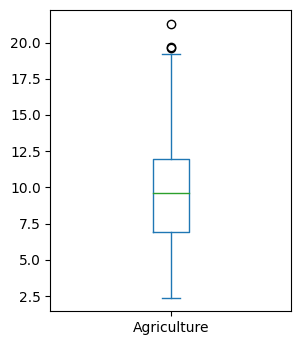

In [26]:
data['Agriculture'].plot(kind='box',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

<Axes: >

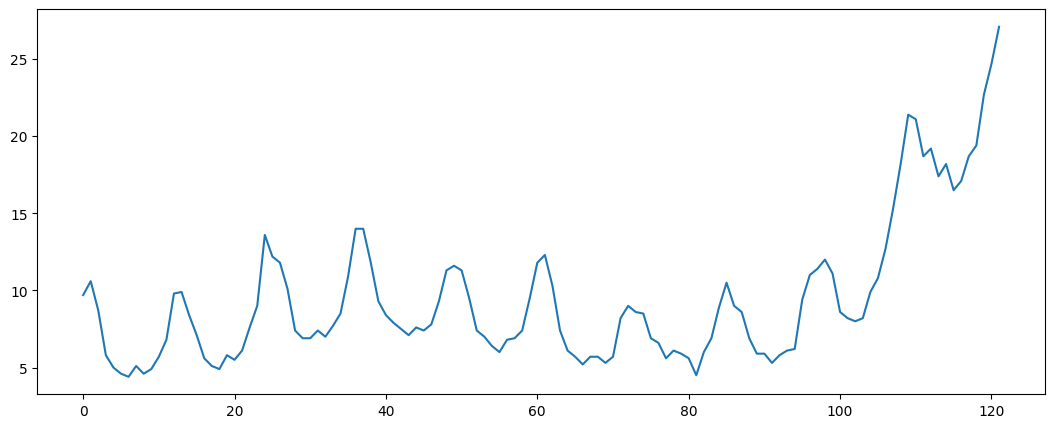

In [27]:
data['Construction'].plot(figsize=(13,5))

<Axes: >

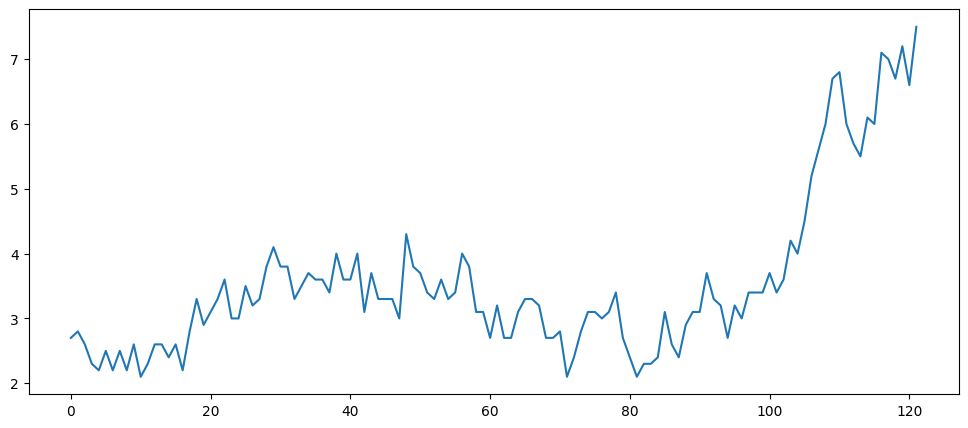

In [28]:
data['Finance'].plot(figsize=(12,5))

In [29]:
data.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


In [30]:
data['Construction'].describe()

count    122.000000
mean       9.426230
std        4.587619
min        4.400000
25%        6.100000
50%        8.100000
75%       10.975000
max       27.100000
Name: Construction, dtype: float64

In [31]:
import plotly.express as px

df =data[["Construction","Finance","Education and Health"]]
fig = px.line(df, facet_col="variable", facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()

In [32]:
#data.index = data.datestamp
#data.head()

In [33]:
data['datestamp'] = pd.to_datetime(data['datestamp'])
data.set_index('datestamp', inplace=True)

In [34]:
data.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [35]:
data.corr()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
Agriculture,1.000000,0.584199,0.731070,0.561559,0.265195,0.462156,0.084390,0.497529,0.579209,0.574365,0.464160,0.579370,0.472808,0.495008,0.566204,0.552524
Business services,0.584199,1.000000,0.841629,0.942027,0.791842,0.851607,0.581863,0.908446,0.898466,0.939219,0.796754,0.893032,0.845129,0.760326,0.901153,0.919151
Construction,0.731070,0.841629,1.000000,0.865205,0.666597,0.850178,0.403237,0.724867,0.884562,0.879209,0.729022,0.878608,0.784347,0.866455,0.896797,0.884891
Durable goods manufacturing,0.561559,0.942027,0.865205,1.000000,0.853618,0.912461,0.644309,0.888100,0.906522,0.995041,0.835594,0.939980,0.860851,0.822932,0.939054,0.941364
Education and Health,0.265195,0.791842,0.666597,0.853618,1.000000,0.839544,0.835802,0.771525,0.810294,0.845528,0.650919,0.789127,0.859732,0.749869,0.822147,0.852276
Finance,0.462156,0.851607,0.850178,0.912461,0.839544,1.000000,0.628323,0.771826,0.887615,0.920757,0.708035,0.902400,0.837094,0.890467,0.904848,0.916699
Government,0.084390,0.581863,0.403237,0.644309,0.835802,0.628323,1.000000,0.594910,0.595542,0.619048,0.489982,0.529111,0.669208,0.519750,0.629122,0.646706
Information,0.497529,0.908446,0.724867,0.888100,0.771525,0.771826,0.594910,1.000000,0.813578,0.880737,0.755450,0.829036,0.774805,0.644686,0.817543,0.825904
Leisure and hospitality,0.579209,0.898466,0.884562,0.906522,0.810294,0.887615,0.595542,0.813578,1.000000,0.916960,0.707060,0.901043,0.862662,0.862630,0.917167,0.931166
Manufacturing,0.574365,0.939219,0.879209,0.995041,0.845528,0.920757,0.619048,0.880737,0.916960,1.000000,0.829512,0.968899,0.860101,0.838559,0.941325,0.948851


<Axes: >

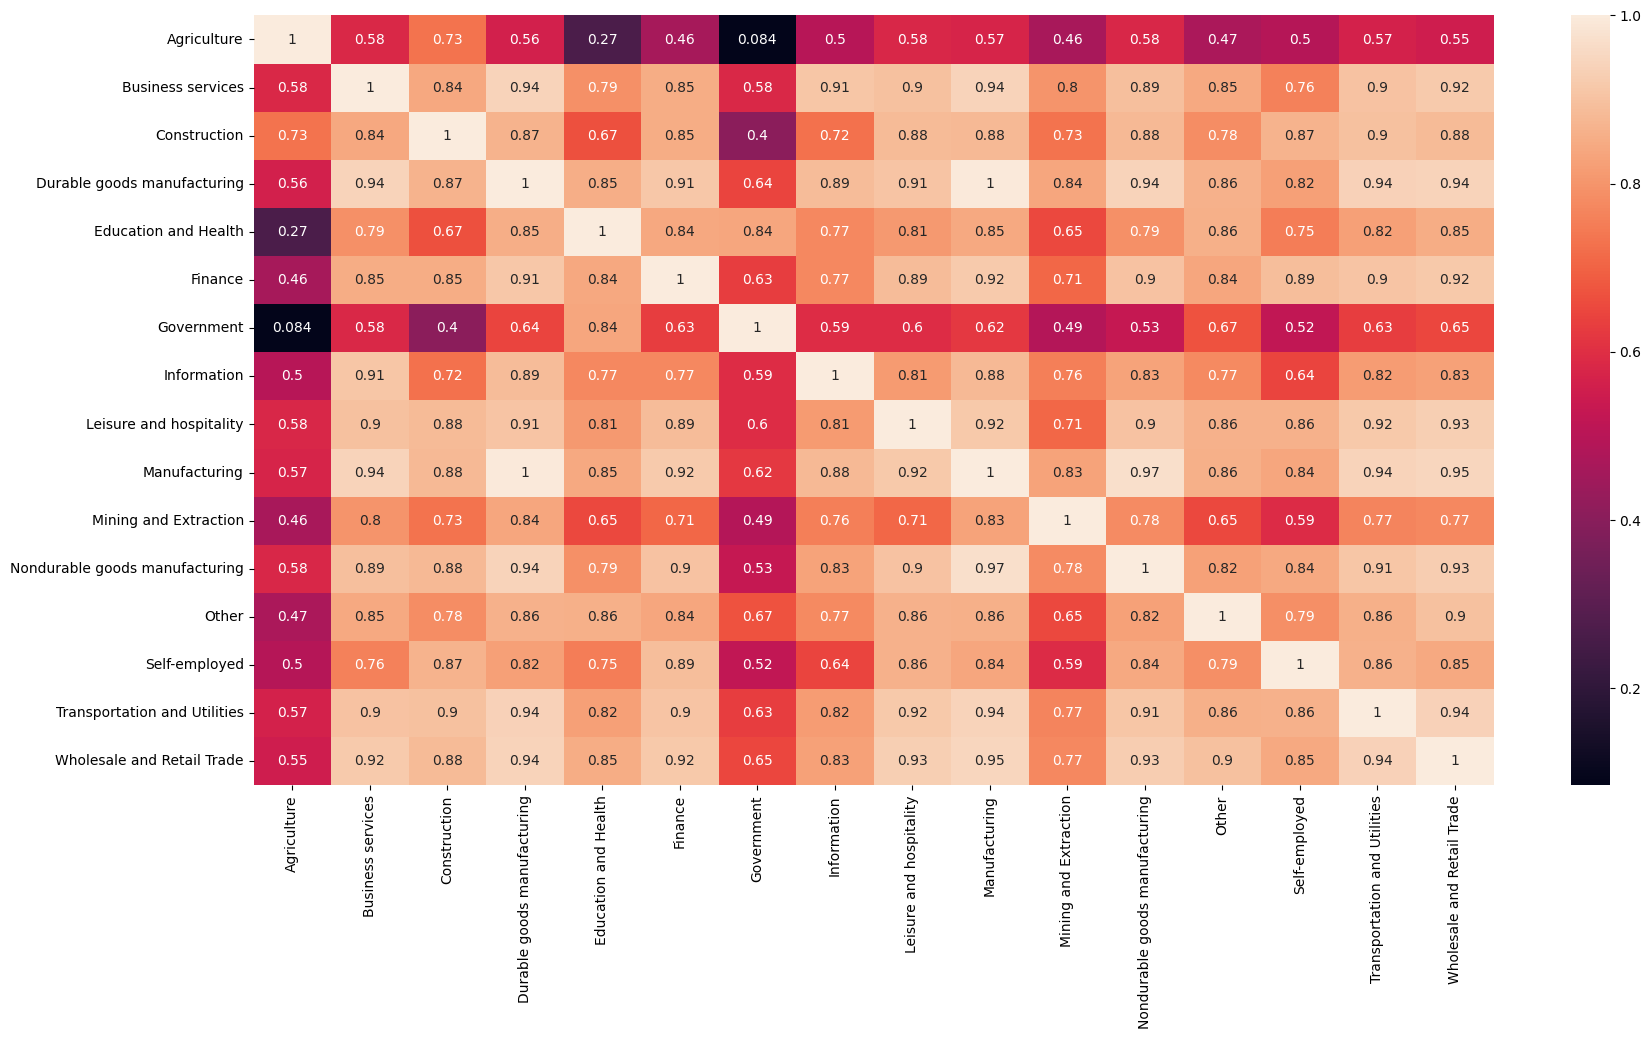

In [36]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(), annot=True)

In [37]:
data.corr()['Finance']

Agriculture                       0.462156
Business services                 0.851607
Construction                      0.850178
Durable goods manufacturing       0.912461
Education and Health              0.839544
Finance                           1.000000
Government                        0.628323
Information                       0.771826
Leisure and hospitality           0.887615
Manufacturing                     0.920757
Mining and Extraction             0.708035
Nondurable goods manufacturing    0.902400
Other                             0.837094
Self-employed                     0.890467
Transportation and Utilities      0.904848
Wholesale and Retail Trade        0.916699
Name: Finance, dtype: float64

In [38]:
data_2005 = filtered_data = data[data.index.year == 2005]
data_2005

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2005-01-01,13.2,7.6,11.8,5.1,3.4,2.7,2.6,5.4,8.7,5.3,4.9,5.7,4.7,3.2,5.0,6.3
2005-02-01,9.9,7.2,12.3,5.1,3.4,3.2,2.3,6.5,8.8,5.3,4.0,5.8,5.3,3.4,4.4,6.2
2005-03-01,11.8,6.5,10.3,4.8,3.4,2.7,2.2,6.0,8.3,5.3,5.2,6.1,5.0,2.9,4.8,5.6
2005-04-01,6.9,5.7,7.4,4.3,3.3,2.7,2.3,5.9,7.7,4.8,2.9,5.6,4.9,2.4,4.7,5.4
2005-05-01,5.3,5.9,6.1,4.1,3.6,3.1,2.1,4.7,7.7,4.5,2.4,5.2,5.0,2.7,4.1,5.4
2005-06-01,5.2,5.8,5.7,4.3,3.6,3.3,3.2,5.0,7.6,4.4,4.0,4.6,4.6,2.4,4.5,5.7
2005-07-01,4.7,6.3,5.2,5.5,3.5,3.3,3.3,4.2,7.4,5.3,3.7,4.9,4.2,2.5,3.9,5.6
2005-08-01,7.1,5.7,5.7,4.5,3.5,3.2,3.2,4.6,6.8,4.7,2.0,4.9,4.8,2.3,3.3,5.3
2005-09-01,9.5,6.7,5.7,4.2,3.5,2.7,2.7,4.9,7.3,4.7,2.0,5.5,4.9,2.6,3.7,4.9


In [39]:
data_2005.mean()

Agriculture                       8.416667
Business services                 6.233333
Construction                      7.450000
Durable goods manufacturing       4.608333
Education and Health              3.416667
Finance                           2.875000
Government                        2.550000
Information                       5.066667
Leisure and hospitality           7.758333
Manufacturing                     4.875000
Mining and Extraction             3.150000
Nondurable goods manufacturing    5.341667
Other                             4.800000
Self-employed                     2.733333
Transportation and Utilities      4.158333
Wholesale and Retail Trade        5.375000
dtype: float64

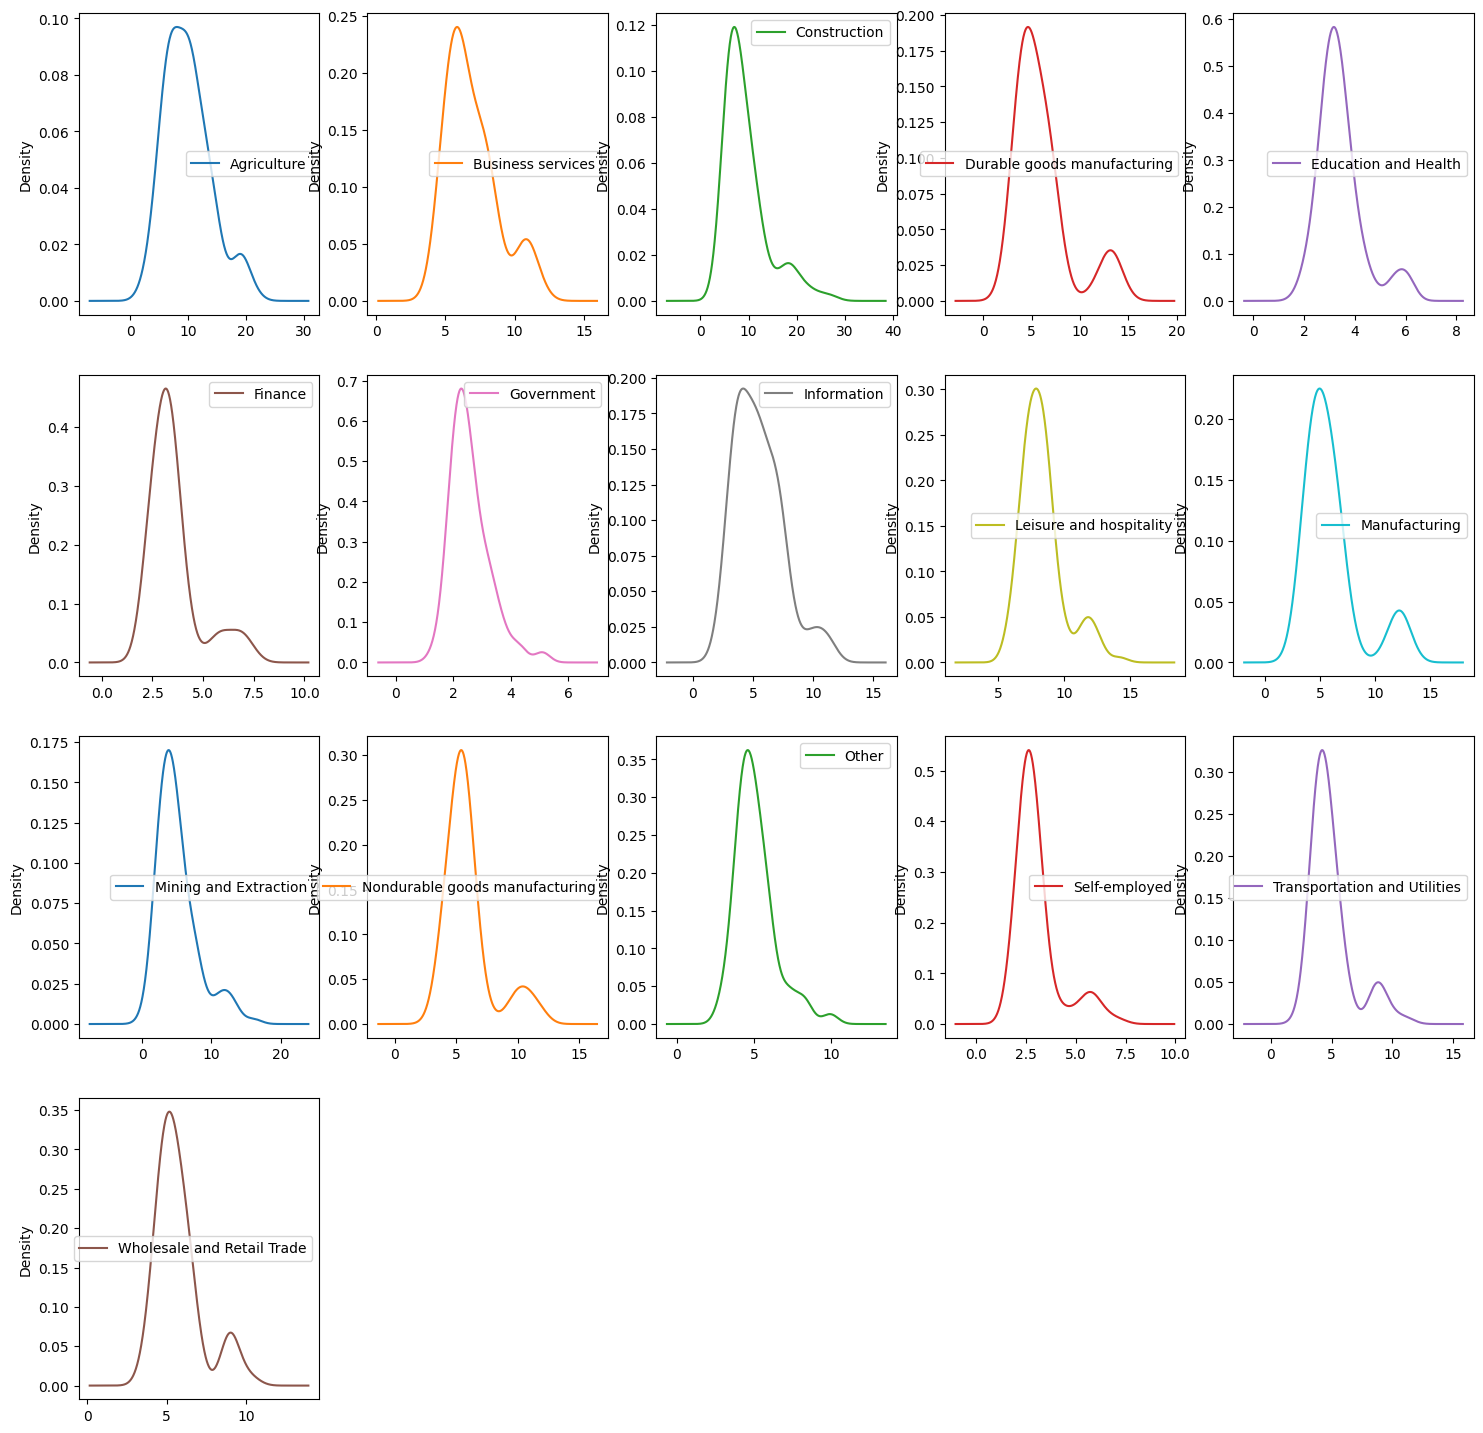

In [40]:
data.plot(kind='density',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

In [41]:
shapiro = st.shapiro(data["Finance"]) #normale si p-value > 0.05
shapiro

ShapiroResult(statistic=0.8031042814254761, pvalue=1.7054059553434087e-11)

In [42]:
for column in data.columns :
  shapiro = st.shapiro(data[column])[1]
  print(column, shapiro)
  if shapiro > 0.05 :
    print(column, 'suit une loi normale')
  else :
    print(column, 'ne suit pas une distribution normale')

Agriculture 0.0004738745919894427
Agriculture ne suit pas une distribution normale
Business services 1.0161004411202157e-06
Business services ne suit pas une distribution normale
Construction 9.401153466814804e-11
Construction ne suit pas une distribution normale
Durable goods manufacturing 7.855274590518047e-12
Durable goods manufacturing ne suit pas une distribution normale
Education and Health 1.0844170894586114e-08
Education and Health ne suit pas une distribution normale
Finance 1.7054059553434087e-11
Finance ne suit pas une distribution normale
Government 9.051570941664977e-07
Government ne suit pas une distribution normale
Information 2.268356729473453e-05
Information ne suit pas une distribution normale
Leisure and hospitality 4.005083198421744e-08
Leisure and hospitality ne suit pas une distribution normale
Manufacturing 4.125914453839696e-12
Manufacturing ne suit pas une distribution normale
Mining and Extraction 1.5519615814696408e-08
Mining and Extraction ne suit pas une di

In [43]:
from statsmodels.tsa.stattools import adfuller as DikeyFuller_test
print('ADF statistic :', DikeyFuller_test(data["Finance"])[0])
print('p-value :', DikeyFuller_test(data["Finance"])[1])
#print(DukeyFuller_test(data["Consommation totale"])[3])
print('critical values:')
for key, value in DikeyFuller_test(data["Finance"])[4].items() :
  print('\t%s: %.3f' % (key, value))

ADF statistic : 0.2803105233043592
p-value : 0.9764228908715749
critical values:
	1%: -3.486
	5%: -2.886
	10%: -2.580


In [44]:
#la serie n'est pas stationnaire car p-value > 0.05

In [45]:
for column in data.columns :
  adf = DikeyFuller_test(data[column])[1]
  print(column, 'p-value ADF = ', adf)
  if adf < 0.05 :
    print(column,'est stationnaire')
  else :
    print(column, "n'est pas statioannaire")

Agriculture p-value ADF =  0.8023439433829875
Agriculture n'est pas statioannaire
Business services p-value ADF =  0.08914839621574722
Business services n'est pas statioannaire
Construction p-value ADF =  0.7967623432062532
Construction n'est pas statioannaire
Durable goods manufacturing p-value ADF =  0.9714706567869748
Durable goods manufacturing n'est pas statioannaire
Education and Health p-value ADF =  0.9095779835557884
Education and Health n'est pas statioannaire
Finance p-value ADF =  0.9764228908715749
Finance n'est pas statioannaire
Government p-value ADF =  0.9203565877369884
Government n'est pas statioannaire
Information p-value ADF =  0.6529066789845839
Information n'est pas statioannaire
Leisure and hospitality p-value ADF =  0.824201940605098
Leisure and hospitality n'est pas statioannaire
Manufacturing p-value ADF =  0.0916181018428327
Manufacturing n'est pas statioannaire
Mining and Extraction p-value ADF =  0.2369750843974036
Mining and Extraction n'est pas statioanna

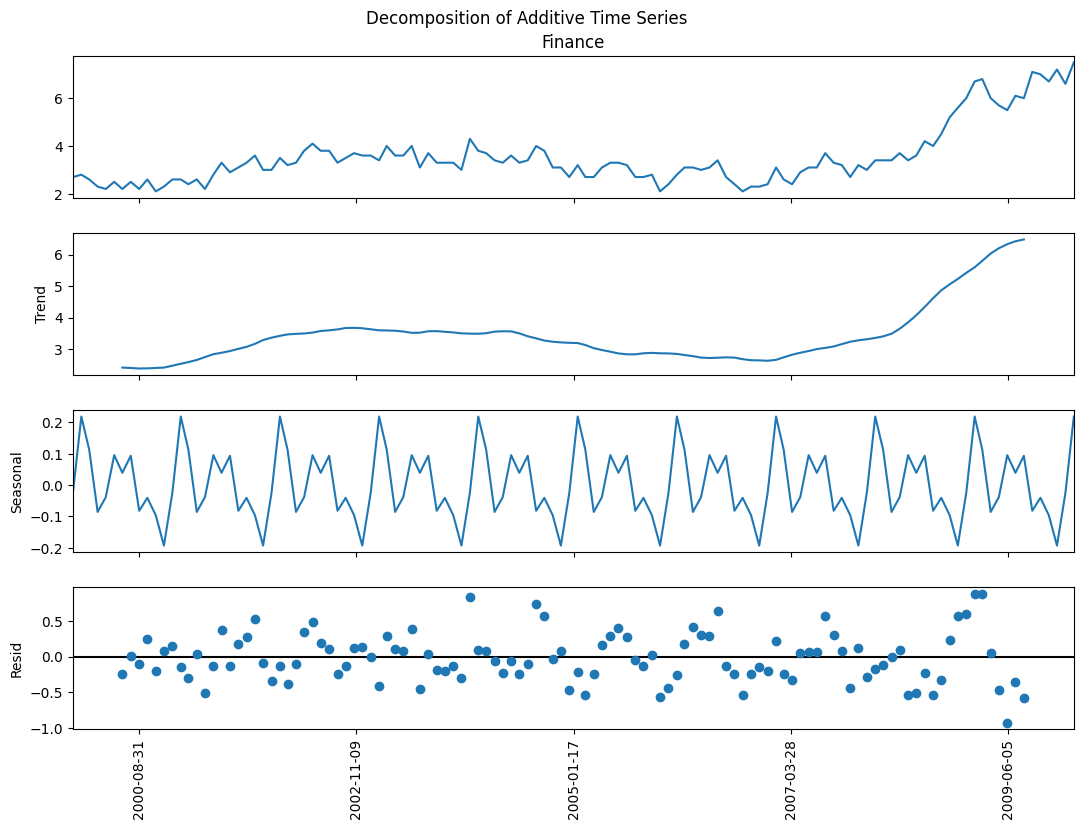

In [46]:
y=data['Finance']
# Seasonal decomposition
decomposition = seasonal_decompose(y, model='additive', period=12)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Additive Time Series')

# par pas de 12
for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

y = b_0 + b_1x_1 + b_2x_2 + ... + b_px_p

In [47]:
#y=ax+b avec le modele OLS Ordinary Least Squares regression ou OLS (moindres carrées)
X=data.drop(columns="Finance").head(97) #les variables explicatives
y=data["Finance"].head(97) #la variable à predire (expliquee)
X = sm.add_constant(X)       #la constante b_0
model = sm.OLS(y, X).fit()   #entrainement du modele

# Print out the statistics
model.params

const                             0.684436
Agriculture                      -0.053372
Business services                 0.023954
Construction                      0.023021
Durable goods manufacturing      -0.619642
Education and Health             -0.127450
Government                        0.276055
Information                       0.104859
Leisure and hospitality           0.088031
Manufacturing                     1.070130
Mining and Extraction            -0.016865
Nondurable goods manufacturing   -0.308618
Other                            -0.040074
Self-employed                    -0.010877
Transportation and Utilities     -0.065613
Wholesale and Retail Trade        0.170622
dtype: float64

Y = b0 + b1x1 + ... + bpxp

In [48]:
X_test=data.drop(columns="Finance").tail(25)
y_test=data["Finance"].tail(25) #la variable à predire
X_test = sm.add_constant(X_test)       #la constante b_0
predict=model.predict(X_test) # make the predictions by the model
predict

datestamp
2008-02-01    2.968870
2008-03-01    2.687553
2008-04-01    2.657923
2008-05-01    3.088807
2008-06-01    3.420393
2008-07-01    3.540699
2008-08-01    3.441729
2008-09-01    3.383787
2008-10-01    3.563234
2008-11-01    3.626584
2008-12-01    3.639779
2009-01-01    4.492266
2009-02-01    4.414041
2009-03-01    4.562533
2009-04-01    4.795514
2009-05-01    5.282685
2009-06-01    5.383278
2009-07-01    5.597022
2009-08-01    5.301918
2009-09-01    5.243201
2009-10-01    5.069782
2009-11-01    5.025347
2009-12-01    4.614643
2010-01-01    5.333435
2010-02-01    5.046654
dtype: float64

In [49]:
res=pd.DataFrame()
res["reel"]=y_test
res["predict"]=predict
res

,reel,predict
datestamp,,
2008-02-01,3.4,2.968870
2008-03-01,3.4,2.687553
2008-04-01,3.4,2.657923
2008-05-01,3.7,3.088807
2008-06-01,3.4,3.420393
2008-07-01,3.6,3.540699
2008-08-01,4.2,3.441729
2008-09-01,4.0,3.383787
2008-10-01,4.5,3.563234


In [50]:
res["error"]=abs(res["reel"]-res["predict"])
res

,reel,predict,error
datestamp,,,
2008-02-01,3.4,2.968870,0.431130
2008-03-01,3.4,2.687553,0.712447
2008-04-01,3.4,2.657923,0.742077
2008-05-01,3.7,3.088807,0.611193
2008-06-01,3.4,3.420393,0.020393
2008-07-01,3.6,3.540699,0.059301
2008-08-01,4.2,3.441729,0.758271
2008-09-01,4.0,3.383787,0.616213
2008-10-01,4.5,3.563234,0.936766


In [51]:
mean_absolute_error=res["error"].mean()
mean_absolute_error

1.1663642907436822

In [52]:
data["Finance"].mean()

3.5401639344262303

In [53]:
err = (res["error"].mean()/data["Finance"].mean())*100
err

32.94661807611234

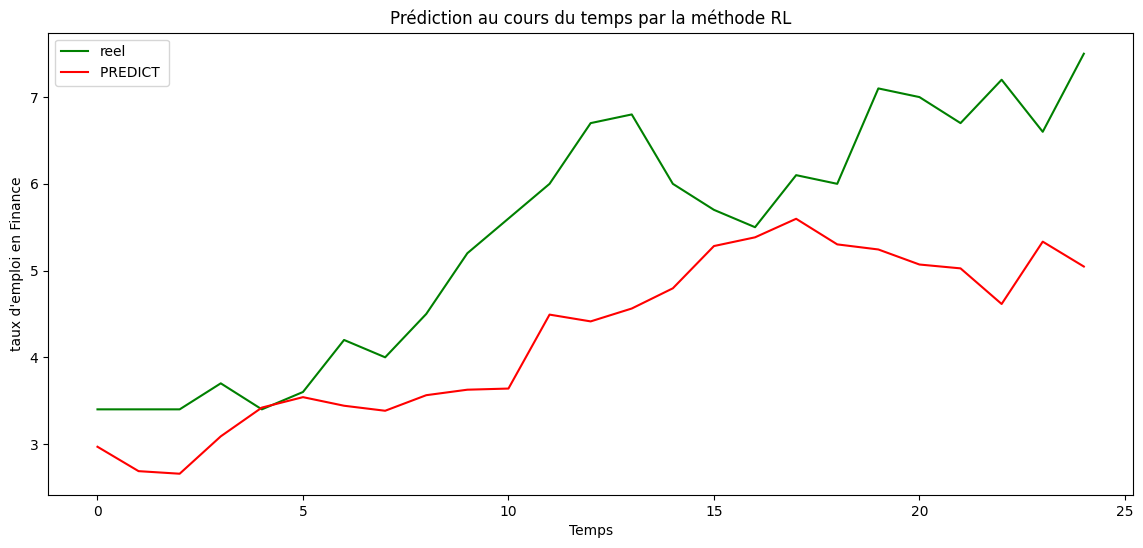

In [54]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='reel', color='green')

plt.plot(predict.values, label='PREDICT ', color='red')

#plt.vlines(x = 100, ymin =y_test.min()*1.2, ymax = 0.8*y_test.max(), colors = 'blue',linestyles = "solid",linewidth=10)

plt.ylabel("taux d'emploi en Finance")
plt.xlabel('Temps')
plt.title('Prédiction au cours du temps par la méthode RL')
plt.legend(loc='best')
plt.show()

In [55]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Finance   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     11.77
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.10e-14
Time:                        07:59:22   Log-Likelihood:                -18.660
No. Observations:                  97   AIC:                             69.32
Df Residuals:                      81   BIC:                             110.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       